In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

In [22]:
# Load data
path = os.path.join("..", "data", "csvresults", "atari_meta.csv")
df = pd.read_csv(path)
df = df.drop('Unnamed: 0', axis=1).set_index("game")
df = df.drop(["Tennis", "Venture", "MontezumaRevenge"])
df.head()

,reg_loss,reg_mse,reg_mae,reg_val_loss,reg_val_mse,reg_val_mae,hlg_mse,hlg_mae,hlg_loss,hlg_val_mse,hlg_val_mae,hlg_val_loss,y_sd,reg_sd,hlg_sd,kl_mean,kl_sd,hist_sd
game,,,,,,,,,,,,,,,,,,
AirRaid,0.008682,0.008682,0.067155,0.010074,0.010074,0.059409,0.008873,0.068780,3.126328,0.008873,0.068190,3.125896,0.136130,0.00000,0.000000,1.354709,1.336799,0.096615
Alien,0.000827,0.000827,0.008731,0.000716,0.000716,0.008891,0.000843,0.007925,2.243576,0.000709,0.008230,2.240457,0.002764,0.00000,0.000692,0.034985,0.007338,0.040571
Amidar,0.000378,0.000378,0.007455,0.000627,0.000627,0.009036,0.000245,0.004485,2.171497,0.001080,0.012648,2.403203,0.011969,0.01614,0.013054,1.802306,2.315752,0.028396
Assault,0.000014,0.000014,0.000053,0.000021,0.000021,0.000043,0.000014,0.000040,2.125762,0.000021,0.000046,2.124676,0.000000,0.00000,0.000000,0.000075,0.000000,0.024049
Asterix,0.000210,0.000210,0.001097,0.000207,0.000207,0.001159,0.000085,0.000581,2.128017,0.000098,0.000816,2.125485,0.000045,0.00000,0.000057,5.000000,0.000000,0.024059


In [23]:
# Select input and response variables
#X = np.sqrt(df["reg_val_mse"].to_numpy())
#Y = np.sqrt(df["hlg_val_mse"].to_numpy())
X = df["reg_val_mae"].to_numpy()
Y = df["hlg_val_mae"].to_numpy()

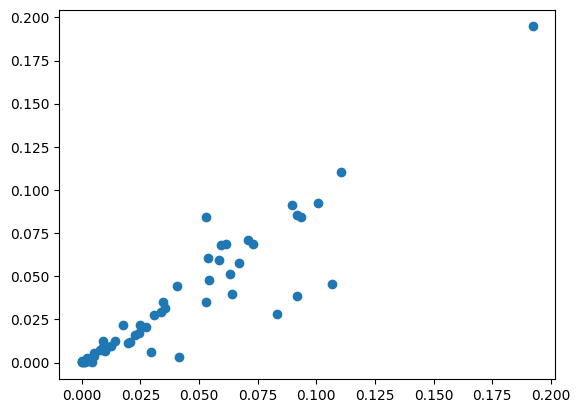

In [24]:
# Plot data
plt.scatter(X, Y)
plt.show()

In [25]:
# Estimate slope
b_hat = np.dot(X.T, Y) / np.dot(X.T, X)
b_hat

0.8671571105168883

In [26]:
# Compute residuals
r = Y - b_hat * X
r

array([ 1.66730020e-02,  5.20068948e-04,  4.81288878e-03,  8.88705004e-06,
       -1.89345742e-04, -3.68552575e-03,  9.55120531e-04,  8.49995949e-04,
       -8.20090990e-05,  1.21247613e-03,  1.52301453e-02,  5.01169681e-03,
        3.84822040e-02,  6.42714567e-04, -2.26376729e-04,  6.38023319e-03,
       -3.76147199e-03,  3.22519936e-03, -3.54840677e-04,  1.22522145e-03,
       -4.66756562e-04,  2.80535801e-02,  1.37596134e-02, -1.56948393e-02,
       -5.86140929e-03,  9.17733199e-03,  4.88892941e-04, -7.04057950e-04,
        6.00009961e-03, -4.10386074e-02,  1.41518418e-05, -1.96738583e-02,
        3.12232631e-05, -1.24503910e-03, -1.73922052e-04, -3.69203586e-03,
       -4.61793405e-04,  1.44540179e-02, -9.41563240e-04,  5.34350708e-03,
        8.96309484e-03, -3.29011979e-02,  1.18290352e-03, -4.13021927e-03,
        1.39399442e-02,  4.80448996e-03, -4.38690373e-02,  9.73292875e-03,
       -5.63458442e-04,  1.24955183e-03, -2.86689855e-03, -1.09898599e-02,
       -2.09449897e-03, -

In [27]:
# Compute SSres
ss_res = np.sum(r ** 2)
ss_res

0.011593349985636365

In [28]:
# Compute standard error
n = len(X)
p = 0
se_b = np.sqrt(ss_res / (np.dot(X.T, X) * (n - p - 1)))
se_b, n

(0.03556904256329661, 55)

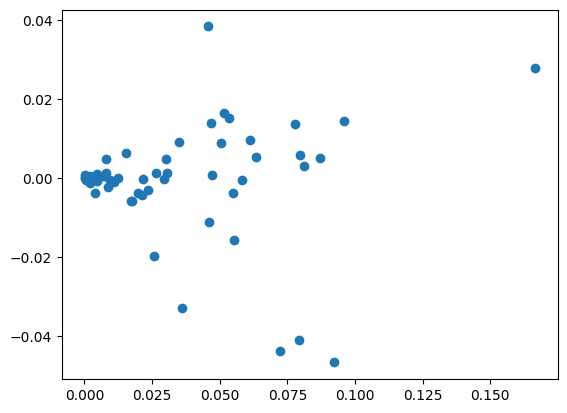

In [29]:
# Plot residuals
plt.scatter(b_hat * X, r)
plt.show()

In [30]:
# Compute confidence interval
alpha = 0.05
t_star = stats.t.ppf(1 - alpha / 2, n - p - 1)
low = b_hat - t_star * se_b
high = b_hat + t_star * se_b

low, high

(0.7958454738387318, 0.9384687471950447)

In [31]:
# Compute one-sided p-value
t_stat = (b_hat - 1) / se_b
p_val = stats.t.cdf(-abs(t_stat), n - p - 1)
p_val

0.00022704565694838127